**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

<center>Master in Computer Engieneering 
<center>Soft computing
<center>Algoritmos géneticos
<center>
<center>Catedrático: Dr. Gaxiola Orduño Luis Fernando
<center>Estudiante: Ing. Luis Ángel Almazán López</center>



<center>
Ninguna pérdida debe sernos más sensible que la del tiempo, puesto que es irreparable.


$Zenón \ de\ Citio$
    
    
</center>    

<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->



# Pendulum!


## Observation space

|Num | Observation | Min | Max|
|----|-------------|-----|----|
|0   |x = cos(theta)|-1.0|1.0|
|1|y = sin(thetha)|-1.0|1.0|
|2|Angular velocity|-8.0 |8.0|



## Action space

|Num|Action|Min|Max|
|-|-|-|-|
|0|Torque|-2.0|2.0|

In [1]:
import gymnasium as gym

# Inicializando varibles linguisticas

In [3]:
import numpy as np
import random

import skfuzzy as fuzz
from skfuzzy import control as ctrl


x = ctrl.Antecedent(np.linspace(-1, 1, 101), 'x')
y = ctrl.Antecedent(np.linspace(-1, 1, 101), 'y')
ang_vel = ctrl.Antecedent(np.linspace(-8, 8, 161), 'ang_vel')


# Salida
torque = ctrl.Consequent(np.linspace(-2, 2, 101), 'torque')



# Funciones demembresía 

In [4]:
x['muy_negativo'] = fuzz.trapmf(x.universe, [-1.0, -1.0, -0.75, -0.5])
x['negativo'] = fuzz.trimf(x.universe, [-0.75, -0.5, -0.25])
x['cero'] = fuzz.trimf(x.universe, [-0.25, 0, 0.25])
x['positivo'] = fuzz.trimf(x.universe, [0.25, 0.5, 0.75])
x['muy_positivo'] = fuzz.trapmf(x.universe, [0.5, 0.75, 1.0, 1.0])

#Funciones de membresía de y
y['muy_negativo'] = fuzz.trapmf(y.universe, [-1.0, -1.0, -0.75, -0.5])
y['negativo'] = fuzz.trimf(y.universe, [-0.75, -0.5, -0.25])
y['cero'] = fuzz.trimf(y.universe, [-0.25, 0, 0.25])
y['positivo'] = fuzz.trimf(y.universe, [0.25, 0.5, 0.75])
y['muy_positivo'] = fuzz.trapmf(y.universe, [0.5, 0.75, 1.0, 1.0])

#Funciones de membresía de ang_vel
ang_vel['muy_negativo'] = fuzz.trapmf(ang_vel.universe, [-8.0, -8.0, -6.0, -4.0])
ang_vel['negativo'] = fuzz.trimf(ang_vel.universe, [-6.0, -4.0, -2.0])
ang_vel['cero'] = fuzz.trimf(ang_vel.universe, [-2.0, 0, 2.0])
ang_vel['positivo'] = fuzz.trimf(ang_vel.universe, [2.0, 4.0, 6.0])
ang_vel['muy_positivo'] = fuzz.trapmf(ang_vel.universe, [4.0, 6.0, 8.0, 8.0])

#Funciones de membresía de torque
torque['muy_negativo'] = fuzz.trimf(torque.universe, [-2.0, -2.0, -1.0])
torque['negativo'] = fuzz.trimf(torque.universe, [-1.5, -1.0, -0.5])
torque['cero'] = fuzz.trimf(torque.universe, [-0.5, 0, 0.5])
torque['positivo'] = fuzz.trimf(torque.universe, [0.5, 1.0, 1.5])
torque['muy_positivo'] = fuzz.trimf(torque.universe, [1.0, 2.0, 2.0])

In [4]:
# Funciones de membresía de x
x['negativo'] = fuzz.trapmf(x.universe, [-1.0, -1.0, -0.5, 0])
x['cero'] = fuzz.trimf(x.universe, [-0.5, 0, 0.5])
x['positivo'] = fuzz.trapmf(x.universe, [0, 0.5, 1.0, 1.0])

# Funciones de membresía de y
y['negativo'] = fuzz.trapmf(y.universe, [-1.0, -1.0, -0.5, 0])
y['cero'] = fuzz.trimf(y.universe, [-0.5, 0, 0.5])
y['positivo'] = fuzz.trapmf(y.universe, [0, 0.5, 1.0, 1.0])

# Funciones de membresía de ang_vel
ang_vel['negativo'] = fuzz.trapmf(ang_vel.universe, [-8.0, -8.0, -4.0, 0])
ang_vel['cero'] = fuzz.trimf(ang_vel.universe, [-4.0, 0, 4.0])
ang_vel['positivo'] = fuzz.trapmf(ang_vel.universe, [0, 4.0, 8.0, 8.0])

# Funciones de membresía de torque
torque['negativo'] = fuzz.trimf(torque.universe, [-2.0, -2.0, 0])
torque['cero'] = fuzz.trimf(torque.universe, [-2.0, 0, 2.0])
torque['positivo'] = fuzz.trimf(torque.universe, [0, 2.0, 2.0])


# Creando control difuzo de prueba

In [5]:
"""
rule1 = ctrl.Rule(x['muy_negativo'] & y['muy_negativo'] & ang_vel['muy_negativo'], torque['muy_positivo'])
rule2 = ctrl.Rule(x['muy_negativo'] & y['negativo'] & ang_vel['negativo'], torque['positivo'])
rule3 = ctrl.Rule(x['muy_negativo'] & y['cero'] & ang_vel['cero'], torque['cero'])
rule4 = ctrl.Rule(x['negativo'] & y['negativo'] & ang_vel['positivo'], torque['negativo'])
rule5 = ctrl.Rule(x['positivo'] & y['muy_positivo'] & ang_vel['muy_positivo'], torque['muy_negativo'])

# Crear el sistema de control difuso
torque_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
"""

"\nrule1 = ctrl.Rule(x['muy_negativo'] & y['muy_negativo'] & ang_vel['muy_negativo'], torque['muy_positivo'])\nrule2 = ctrl.Rule(x['muy_negativo'] & y['negativo'] & ang_vel['negativo'], torque['positivo'])\nrule3 = ctrl.Rule(x['muy_negativo'] & y['cero'] & ang_vel['cero'], torque['cero'])\nrule4 = ctrl.Rule(x['negativo'] & y['negativo'] & ang_vel['positivo'], torque['negativo'])\nrule5 = ctrl.Rule(x['positivo'] & y['muy_positivo'] & ang_vel['muy_positivo'], torque['muy_negativo'])\n\n# Crear el sistema de control difuso\ntorque_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])\n"

In [6]:

rule1 = ctrl.Rule(x['negativo'] & y['negativo'] & ang_vel['negativo'], torque['positivo'])
rule2 = ctrl.Rule(x['negativo'] & y['negativo'] & ang_vel['cero'], torque['positivo'])
rule3 = ctrl.Rule(x['negativo'] & y['negativo'] & ang_vel['positivo'], torque['cero'])
rule4 = ctrl.Rule(x['negativo'] & y['cero'] & ang_vel['negativo'], torque['positivo'])
rule5 = ctrl.Rule(x['negativo'] & y['cero'] & ang_vel['cero'], torque['positivo'])
rule6 = ctrl.Rule(x['negativo'] & y['cero'] & ang_vel['positivo'], torque['cero'])
rule7 = ctrl.Rule(x['negativo'] & y['positivo'] & ang_vel['negativo'], torque['positivo'])
rule8 = ctrl.Rule(x['negativo'] & y['positivo'] & ang_vel['cero'], torque['positivo'])
rule9 = ctrl.Rule(x['negativo'] & y['positivo'] & ang_vel['positivo'], torque['cero'])
rule10 = ctrl.Rule(x['cero'] & y['negativo'] & ang_vel['negativo'], torque['cero'])
rule11 = ctrl.Rule(x['cero'] & y['negativo'] & ang_vel['cero'], torque['cero'])
rule12 = ctrl.Rule(x['cero'] & y['negativo'] & ang_vel['positivo'], torque['cero'])
rule13 = ctrl.Rule(x['cero'] & y['cero'] & ang_vel['negativo'], torque['cero'])
rule14 = ctrl.Rule(x['cero'] & y['cero'] & ang_vel['cero'], torque['cero'])
rule15 = ctrl.Rule(x['cero'] & y['cero'] & ang_vel['positivo'], torque['cero'])
rule16 = ctrl.Rule(x['cero'] & y['positivo'] & ang_vel['negativo'], torque['cero'])
rule17 = ctrl.Rule(x['cero'] & y['positivo'] & ang_vel['cero'], torque['cero'])
rule18 = ctrl.Rule(x['cero'] & y['positivo'] & ang_vel['positivo'], torque['cero'])
rule19 = ctrl.Rule(x['positivo'] & y['negativo'] & ang_vel['negativo'], torque['cero'])
rule20 = ctrl.Rule(x['positivo'] & y['negativo'] & ang_vel['cero'], torque['cero'])
rule21 = ctrl.Rule(x['positivo'] & y['negativo'] & ang_vel['positivo'], torque['negativo'])
rule22 = ctrl.Rule(x['positivo'] & y['cero'] & ang_vel['negativo'], torque['cero'])
rule23 = ctrl.Rule(x['positivo'] & y['cero'] & ang_vel['cero'], torque['cero'])
rule24 = ctrl.Rule(x['positivo'] & y['cero'] & ang_vel['positivo'], torque['negativo'])
rule25 = ctrl.Rule(x['positivo'] & y['positivo'] & ang_vel['negativo'], torque['cero'])
rule26 = ctrl.Rule(x['positivo'] & y['positivo'] & ang_vel['cero'], torque['cero'])
rule27 = ctrl.Rule(x['positivo'] & y['positivo'] & ang_vel['positivo'], torque['negativo'])


C:\Users\luis1\.conda\envs\soft\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


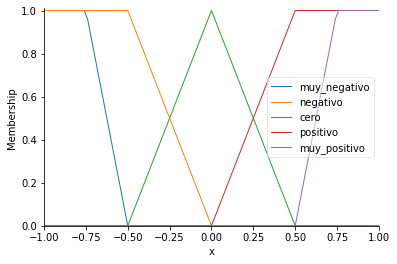

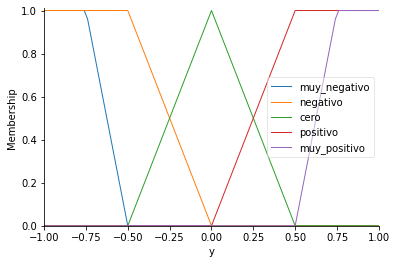

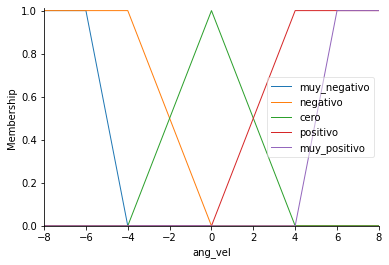

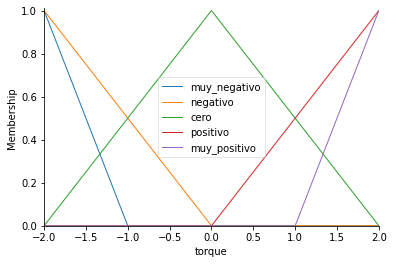

In [7]:
x.view()
y.view()
ang_vel.view()
torque.view()

# Simulación del control difuzo de ejemplo

In [3]:
#Agregar las reglas al sistema de control
torque_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                                  rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
                                  rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25,
                                  rule26, rule27])

# Crear un simulador del sistema de control difuso
torque_simulador = ctrl.ControlSystemSimulation(torque_ctrl)



#6. Evaluar el sistema de control para valores de entrada específicos y obtener la salida difusa:


# Definir los valores de entrada
x_value = 0.5
y_value = -0.3
ang_vel_value = 4.0

# Evaluar el sistema de control difuso para los valores de entrada
torque_simulador.input['x'] = 0.5
torque_simulador.input['y'] = -0.8
torque_simulador.input['ang_vel'] = 6.2

# Ejecutar la simulación
torque_simulador.compute()

# Obtener el valor de salida
print(torque_simulador.output['torque'])


# Visualizar las funciones de membresía de cada variable lingüística
x.view()
y.view()
ang_vel.view()
torque.view()


torque_ctrl.view()

NameError: name 'rule1' is not defined

In [8]:
"""
torque_simulador = ctrl.ControlSystemSimulation(torque_ctrl)



#6. Evaluar el sistema de control para valores de entrada específicos y obtener la salida difusa:


# Definir los valores de entrada
x_value = 0.5
y_value = -0.3
ang_vel_value = 4.0

# Evaluar el sistema de control difuso para los valores de entrada
torque_simulador.input['x'] = 0.5
torque_simulador.input['y'] = -0.8
torque_simulador.input['ang_vel'] = 6.2

# Ejecutar la simulación
torque_simulador.compute()

# Obtener el valor de salida
print(torque_simulador.output['torque'])


# Visualizar las funciones de membresía de cada variable lingüística
x.view()
y.view()
ang_vel.view()
torque.view()


torque_ctrl.view()

"""

"\ntorque_simulador = ctrl.ControlSystemSimulation(torque_ctrl)\n\n\n\n#6. Evaluar el sistema de control para valores de entrada específicos y obtener la salida difusa:\n\n\n# Definir los valores de entrada\nx_value = 0.5\ny_value = -0.3\nang_vel_value = 4.0\n\n# Evaluar el sistema de control difuso para los valores de entrada\ntorque_simulador.input['x'] = 0.5\ntorque_simulador.input['y'] = -0.8\ntorque_simulador.input['ang_vel'] = 6.2\n\n# Ejecutar la simulación\ntorque_simulador.compute()\n\n# Obtener el valor de salida\nprint(torque_simulador.output['torque'])\n\n\n# Visualizar las funciones de membresía de cada variable lingüística\nx.view()\ny.view()\nang_vel.view()\ntorque.view()\n\n\ntorque_ctrl.view()\n\n"

# Algoritmo génetico

genoma = [x_neg_a, x_neg_b, x_neg_c, x_cero_a, x_cero_b, x_cero_c, x_pos_a, x_pos_b, x_pos_c,          
y_neg_a, y_neg_b, y_neg_c, y_cero_a, y_cero_b, y_cero_c, y_pos_a, y_pos_b, y_pos_c,           
ang_vel_neg_a, ang_vel_neg_b, ang_vel_neg_c, ang_vel_cero_a, ang_vel_cero_b, ang_vel_cero_c, ang_vel_pos_a, ang_vel_pos_b, ang_vel_pos_c,           torque_neg_a, torque_neg_b, torque_cero_a, torque_cero_b, torque_pos_a, torque_pos_b]


In [309]:
np.pi

3.141592653589793

In [4]:
POPULATION_SIZE = 100
def gen_population(POPULATION_SIZE):
    
        poblacion = []
        
        for i in range(POPULATION_SIZE):
            """
            x_points = [
            [-1, random.uniform(-1, -0.8),random.uniform(-0.8, -0.5)], #Muy negativo
            [random.uniform(-0.8, -0.7),random.uniform(-0.6, -0.5),random.uniform(-0.3, 0)  ], #Negativo
            [random.uniform(-0.5,0),0,random.uniform(0,0.5)], #Centro
            [random.uniform(0, 0.3), random.uniform(0.6, 0.5),random.uniform(0.7, 0.8)],#Positivo
            [random.uniform(0.8, 0.5),random.uniform(0.8, 1),1]]#Muy positivo

            # Generar puntos para las funciones de membresía de y
            y_points = [
            [-1, random.uniform(-1, -0.8),random.uniform(-0.8, -0.5)], #Muy negativo
            [random.uniform(-0.8, -0.7),random.uniform(-0.6, -0.5),random.uniform(-0.3, 0)  ], #Negativo
            [random.uniform(-0.5,0),0,random.uniform(0,0.5)], #Centro
            [random.uniform(0, 0.3), random.uniform(0.6, 0.5),random.uniform(0.7, 0.8)],#Positivo
            [random.uniform(0.8, 0.5),random.uniform(0.8, 1),1]]#Muy positivo

            """
            # Generar puntos para las  nbfunciones de membresía de x

            ang = [[0,random.uniform(0, np.pi/4), random.uniform(np.pi/4, 3*np.pi/8)], # Derecha 0 a 3pi/8
            [np.pi, 5*np.pi/4, 2*np.pi], #Abajo (pi a 2pi)
            [random.uniform(9*np.pi/16, 3*np.pi/4), np.pi, random.uniform(5*np.pi/4, 11*np.pi/8)], #izq , de 3pi/4 a 5pi/4
            [1*np.pi/8, random.uniform(3*np.pi/8, np.pi/2), 5*np.pi/8],# cercas Der 
            [3*np.pi/8, random.uniform(3*np.pi/8,5*np.pi/8),7*np.pi/8]]#cercas izq

            # Generar puntos para las funciones de membresía de ang_vel
            ang_vel_points = [
            [-8, random.uniform(-8, -6),random.uniform(-6, -4)], #Muy negativo
            [random.uniform(-6, -4),random.uniform(-4, -2),random.uniform(-2, -1) ], #Negativo
            [random.uniform(-4,-2),0,random.uniform(2,4)], #Centro
            [random.uniform(1, 2), random.uniform(2,4),random.uniform(4, 6)],#Positivo
            [random.uniform(4,6),random.uniform(6, 8), 8]]#Muy positivo

            # Generar puntos para las funciones de membresía de torque

            torque_points =[[-2, random.uniform(-1.5, -1.3),random.uniform(-1.3, -0.7)], #Muy negativo
            [random.uniform(-1.5, -1),random.uniform(-1, -0.5),random.uniform(-0.5, -0.2)  ], #Negativo
            [random.uniform(-0.8,-0.3),0,random.uniform(0.3,0.8)], #Centro
            [random.uniform(0.2, 0.5), random.uniform(0.5, 1),random.uniform(1, 1.5)],#Positivo
            [random.uniform(0.7, 1.3),random.uniform(1.3, 1.5),2]]#Muy positivo



            genoma = [ang, ang_vel_points, torque_points]

            poblacion.append(genoma)

            return poblacion
    


In [5]:
poblacion = gen_population(POPULATION_SIZE)

In [6]:
cromosoma = poblacion[0]

In [7]:
cromosoma[0]

[[0, 0.40903541214537675, 0.8081230407984107],
 [3.141592653589793, 3.9269908169872414, 6.283185307179586],
 [1.792765462144385, 3.141592653589793, 4.3096005555756225],
 [0.39269908169872414, 1.21569314978087, 1.9634954084936207],
 [1.1780972450961724, 1.7387575904093677, 2.748893571891069]]

# Función para generar reglas

El controlador necesitará 5**3 reglas para cubrir todas las posibilidades de valores de entrada, puedes hacer una función que genere estas reglas? quiero que utilize otra función que genere la funciónes de pertencia si se le pasa como parámetro los cromosomas de un individuo

In [8]:
def generar_funciones_pertenencia(cromosomas):
    """    x = ctrl.Antecedent(np.linspace(-1, 1, 101), 'x')
    y = ctrl.Antecedent(np.linspace(-1, 1, 101), 'y')"""
    ang =  ctrl.Antecedent(np.linspace(0, 2*np.pi, 161), 'ang')
    ang_vel = ctrl.Antecedent(np.linspace(-8, 8, 161), 'ang_vel')
    
    # Salida
    
    torque = ctrl.Consequent(np.linspace(-2, 2, 101), 'torque')
    #x_functions, y_functions
    ang_function, ang_vel_functions, torque_function = cromosomas
    # Generar las funciones de pertenencia a partir de los cromosomas
    #print(ang_function)
    """

    for index, val in enumerate(x_functions):
        if index==0:
            x[str(index)] =   fuzz.trapmf(x.universe, [-1,val[0],val[1],val[2]])
            continue
        if index==4:
            x[str(index)] =   fuzz.trapmf(x.universe, [val[0], val[1], val[2],1])
            continue   
        else:
            #fuzz.trimf(x.universe, [min(val), sorted(val), max(val)])
            x[str(index)] = fuzz.trimf(x.universe, [*val])
            continue
            
    for index, val in enumerate(y_functions):
        if index==0:
            y[str(index)] =   fuzz.trapmf(y.universe, [-1,val[0],val[1],val[2]])
            continue
        if index==4:
            y[str(index)] =   fuzz.trapmf(y.universe, [val[0], val[1], val[2],1])
            continue   
        else:
            #fuzz.trimf(x.universe, [min(val), sorted(val), max(val)])
            y[str(index)] = fuzz.trimf(y.universe, [*val])"""
    
    for index, val in enumerate(ang_function):
        if index==0:
            ang[str(index)] =   fuzz.trapmf(ang.universe, [0,val[0],val[1],val[2]])
            continue  
        else:
            #fuzz.trimf(x.universe, [min(val), sorted(val), max(val)])
            ang[str(index)] = fuzz.trimf(ang.universe, [*val])
            
    for index, val in enumerate(ang_vel_functions):
        if index==0:
            ang_vel[str(index)] =   fuzz.trapmf(ang_vel.universe, [-8,val[0],val[1],val[2]])
            continue
        if index==4: 
            ang_vel[str(index)] =   fuzz.trapmf(ang_vel.universe, [val[0],val[1],val[2],8])
            continue   
        else:
            #fuzz.trimf(x.universe, [min(val), sorted(val), max(val)])
            ang_vel[str(index)] = fuzz.trimf(ang_vel.universe, [*val])
    
    for index, val in enumerate(torque_function):
        if index==0:
            torque[str(index)] =   fuzz.trapmf(torque.universe, [-2,val[0],val[1],val[2]])
            continue
        if index==4:
            torque[str(index)] =   fuzz.trapmf(torque.universe, [val[0],val[1],val[2],8])
            continue   
        else:
            #fuzz.trimf(x.universe, [min(val), sorted(val), max(val)])
            torque[str(index)] = fuzz.trimf(torque.universe, [*val])
    return ang,ang_vel, torque



In [9]:
ang, ang_vel, torque = generar_funciones_pertenencia(cromosoma)
ang, ang_vel, torque

(Antecedent: ang, Antecedent: ang_vel, Consequent: torque)

In [10]:
cromosoma

[[[0, 0.40903541214537675, 0.8081230407984107],
  [3.141592653589793, 3.9269908169872414, 6.283185307179586],
  [1.792765462144385, 3.141592653589793, 4.3096005555756225],
  [0.39269908169872414, 1.21569314978087, 1.9634954084936207],
  [1.1780972450961724, 1.7387575904093677, 2.748893571891069]],
 [[-8, -6.171085837201355, -5.125602812301343],
  [-4.671973859307114, -3.1373111650854346, -1.8621625217838063],
  [-3.9324011577628104, 0, 3.2165781821525656],
  [1.2627267046579087, 3.8559070024111843, 4.71706752759827],
  [5.849894545100431, 6.865896736007554, 8]],
 [[-2, -1.396555177749466, -1.0519576584853387],
  [-1.3557899474879271, -0.7477555891693359, -0.22239546922433134],
  [-0.7996870399369971, 0, 0.6527759877439345],
  [0.453481013644634, 0.8828567973334007, 1.3736234724628895],
  [1.0205115934838387, 1.322037084069221, 2]]]

C:\Users\luis1\.conda\envs\soft\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


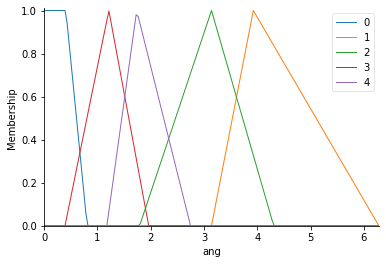

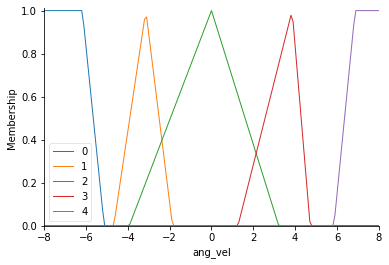

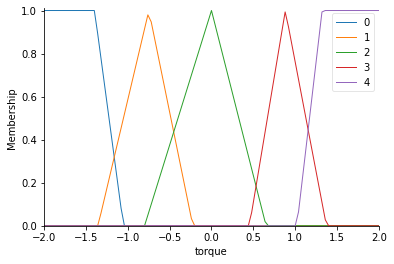

In [11]:
ang.view()
ang_vel.view()
torque.view()



In [12]:
#Verificando función para generar reglas
len(x.terms),len(y.terms), len(ang_vel.terms), len(torque.terms)


(0, 0, 5, 5)

In [13]:
labels= ["0","1","2","3","4"]
for i in range(5):
    for j in range(5):
            torque_label = random.choice(labels)
            print(f"rule = ctrl.Rule(ang['{i}'] & ang_vel['{j}'], torque['{torque_label}'])")
            print("rules.append(rule)")
    

rule = ctrl.Rule(ang['0'] & ang_vel['0'], torque['4'])
rules.append(rule)
rule = ctrl.Rule(ang['0'] & ang_vel['1'], torque['4'])
rules.append(rule)
rule = ctrl.Rule(ang['0'] & ang_vel['2'], torque['1'])
rules.append(rule)
rule = ctrl.Rule(ang['0'] & ang_vel['3'], torque['2'])
rules.append(rule)
rule = ctrl.Rule(ang['0'] & ang_vel['4'], torque['3'])
rules.append(rule)
rule = ctrl.Rule(ang['1'] & ang_vel['0'], torque['2'])
rules.append(rule)
rule = ctrl.Rule(ang['1'] & ang_vel['1'], torque['3'])
rules.append(rule)
rule = ctrl.Rule(ang['1'] & ang_vel['2'], torque['0'])
rules.append(rule)
rule = ctrl.Rule(ang['1'] & ang_vel['3'], torque['0'])
rules.append(rule)
rule = ctrl.Rule(ang['1'] & ang_vel['4'], torque['0'])
rules.append(rule)
rule = ctrl.Rule(ang['2'] & ang_vel['0'], torque['2'])
rules.append(rule)
rule = ctrl.Rule(ang['2'] & ang_vel['1'], torque['1'])
rules.append(rule)
rule = ctrl.Rule(ang['2'] & ang_vel['2'], torque['2'])
rules.append(rule)
rule = ctrl.Rule(ang['2'] & ang_vel['3

In [14]:
def generate_rules(ang, ang_vel, torque):
    rules = []    
    
    rule = ctrl.Rule(ang['0'] & ang_vel['0'], torque['4'])
    rules.append(rule)
    rule = ctrl.Rule(ang['0'] & ang_vel['1'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['0'] & ang_vel['2'], torque['2'])
    rules.append(rule)
    rule = ctrl.Rule(ang['0'] & ang_vel['3'], torque['1'])
    rules.append(rule)
    rule = ctrl.Rule(ang['0'] & ang_vel['4'], torque['0'])
    rules.append(rule)
    rule = ctrl.Rule(ang['1'] & ang_vel['0'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['1'] & ang_vel['1'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['1'] & ang_vel['2'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['1'] & ang_vel['3'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['1'] & ang_vel['4'], torque['2'])
    rules.append(rule)
    rule = ctrl.Rule(ang['2'] & ang_vel['0'], torque['1'])
    rules.append(rule)
    rule = ctrl.Rule(ang['2'] & ang_vel['1'], torque['1'])
    rules.append(rule)
    rule = ctrl.Rule(ang['2'] & ang_vel['2'], torque['2'])
    rules.append(rule)
    rule = ctrl.Rule(ang['2'] & ang_vel['3'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['2'] & ang_vel['4'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['3'] & ang_vel['0'], torque['4'])
    rules.append(rule)
    rule = ctrl.Rule(ang['3'] & ang_vel['1'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['3'] & ang_vel['2'], torque['2'])
    rules.append(rule)
    rule = ctrl.Rule(ang['3'] & ang_vel['3'], torque['1'])
    rules.append(rule)
    rule = ctrl.Rule(ang['3'] & ang_vel['4'], torque['0'])
    rules.append(rule)
    rule = ctrl.Rule(ang['4'] & ang_vel['0'], torque['4'])
    rules.append(rule)
    rule = ctrl.Rule(ang['4'] & ang_vel['1'], torque['3'])
    rules.append(rule)
    rule = ctrl.Rule(ang['4'] & ang_vel['2'], torque['2'])
    rules.append(rule)
    rule = ctrl.Rule(ang['4'] & ang_vel['3'], torque['1'])
    rules.append(rule)
    rule = ctrl.Rule(ang['4'] & ang_vel['4'], torque['0'])
    rules.append(rule)
                
    return rules


In [67]:
generate_rules(ang, ang_vel, torque)

[IF ang[0] AND ang_vel[0] THEN torque[4]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[0] AND ang_vel[1] THEN torque[3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[0] AND ang_vel[2] THEN torque[2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[0] AND ang_vel[3] THEN torque[1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[0] AND ang_vel[4] THEN torque[0]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[1] AND ang_vel[0] THEN torque[3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[1] AND ang_vel[1] THEN torque[4]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[1] AND ang_vel[2] THEN torque[2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[1] AND ang_vel[3] THEN torque[1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ang[1]

In [15]:
import gymnasium as gym
env = gym.make('Pendulum-v1', g=9.81, render_mode="human")
env.reset()

(array([-0.21768536, -0.976019  , -0.19944668], dtype=float32), {})

In [16]:
env.action_space.sample()

array([-1.0898622], dtype=float32)

In [17]:

observation, rewards, done, info,_ = env.step([2])
env.render()
print(observation, rewards, done, info)

[-0.24771397 -0.9688332  -0.61755264] -3.212932342203611 False False


In [143]:
env.close()

In [18]:
def create_fuzzy_controller(cromosomas):
    ang, ang_vel, torque = generar_funciones_pertenencia(cromosomas)
    rules = generate_rules(ang, ang_vel, torque)
    
    fuzzy_controller = ctrl.ControlSystem(rules)
    return fuzzy_controller


In [19]:
fuzzy_controller = create_fuzzy_controller(cromosoma)

C:\Users\luis1\.conda\envs\soft\Lib\site-packages\skfuzzy\control\controlsystem.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


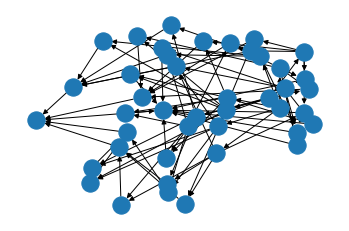

In [20]:
fuzzy_controller.view()

In [104]:
#env = gym.make('Pendulum-v1', g=9.81, render_mode="rgb_array")
env = gym.make('Pendulum-v1', g=9.81, render_mode="human")


In [21]:
import math

def calcular_angulo(y, x):
    angulo_rad = math.atan2(y, -x)
    if angulo_rad < 0:
        angulo_rad += 2 * math.pi  # Ajustar el ángulo para que sea positivo en radianes
    return angulo_rad


In [22]:
def evaluate(cromosomas, num_episodes=5, render = "rgb_array"):
    
    #env = gym.make('Pendulum-v1', g=9.81, render_mode="human")
    env = gym.make('Pendulum-v1', g=9.81, render_mode=render)
    fuzzy_controller = create_fuzzy_controller(cromosomas)
    control_simulation = ctrl.ControlSystemSimulation(fuzzy_controller)

    total_reward = 0
    for episode in range(num_episodes):
        state = env.reset()[0]
        done = False
        episode_reward = 0
        steps = 0
        while (not done) and (steps <=100):
            x_val, y_val, ang_vel_val = state
            ang = calcular_angulo(x_val, -y_val)
            control_simulation.input['ang'] = ang
            control_simulation.input['ang_vel'] = ang_vel_val
            
            try:
                control_simulation.compute()
                action = control_simulation.output['torque']
                #print(action)
    
            except :
                
                action = 3
                #print("Error")
    
        
            state, reward, done,info, _ = env.step([action])
            #env.render
            episode_reward += reward
            
            steps +=1
        total_reward += episode_reward
    env.close()
    return total_reward / num_episodes


In [23]:
 evaluate(cromosoma, render ="human")

-599.4263989184522

In [84]:
env.close()

###  Crosover, selection and mutation

In [24]:
def selection(population, scores, k=3):
    selected_indices = np.argsort(scores)[-k:]
    selected_population = [population[i] for i in selected_indices]
    return selected_population


In [25]:
def crossover(parent1, parent2):
    child = []

    for p1, p2 in zip(parent1, parent2):
        c = []

        for p1_gene, p2_gene in zip(p1, p2):
            if random.random() < 0.5:
                c.append(p1_gene)
            else:
                c.append(p2_gene)

        child.append(c)

    return child


In [26]:
def mutation(genome, mutation_rate=0.1):
    mutated_genome = []

    for gene in genome:
        mutated_gene = []

        for feature in gene:
            if random.random() < mutation_rate:
                mutated_value = [random.uniform(min(feature), max(feature)) for _ in feature]
                mutated_gene.append(mutated_value)
            else:
                mutated_gene.append(feature)

        mutated_genome.append(mutated_gene)

    return mutated_genome


### Genetic algorithm

In [27]:
import pickle

def save_best_individual(best_individual, filename):
    with open(filename, 'wb') as file:
        pickle.dump(best_individual, file)
    print(f"Mejor individuo guardado en el archivo: {filename}")


In [161]:
def run_genetic_algorithm(population_size, generations, elite_size=3, mutation_rate=1):
    population = gen_population(population_size)
    best_individual = None
    best_score = float('-inf')

    for generation in range(generations):
        print(f"Generation: {generation}======================================================")
        
        scores = [evaluate(individual) for individual in population]
        elite = selection(population, scores, elite_size)
        best_of_generation = max(scores)

        if best_of_generation > best_score:
            best_score = best_of_generation
            best_individual = population[np.argmax(scores)]

        print(f"Generation {generation+1} | Best score: {best_score}")

        children = []
        for i in range(population_size - elite_size):
            parent1, parent2 = random.sample(elite, 2)
            child = crossover(parent1, parent2)
            mutated_child = mutation(child, mutation_rate)
            children.append(mutated_child)

        population = elite + children

    return best_individual, best_score

if __name__ == "__main__":
    POPULATION_SIZE = 10
    GENERATIONS = 50
    ELITE_SIZE = 10
    MUTATION_RATE = 0.1

    best_individual, best_score = run_genetic_algorithm(POPULATION_SIZE, GENERATIONS, ELITE_SIZE, MUTATION_RATE)
    
    filename = "D:/MIC/Enero junio 2023/softComputing/best_ind/best_individual2.pkl"
    save_best_individual(best_individual, filename)
    print(f"Best individual: {best_individual}")
    print(f"Best score: {best_score}")

Generation: 0======================================================
Generation 1 | Best score: -641.2840979975161
Generation: 1======================================================
Generation 2 | Best score: -593.8418794581969
Generation: 2======================================================
Generation 3 | Best score: -504.6187108524252
Generation: 3======================================================
Generation 4 | Best score: -504.6187108524252
Generation: 4======================================================
Generation 5 | Best score: -504.6187108524252
Generation: 5======================================================
Generation 6 | Best score: -504.6187108524252
Generation: 6======================================================
Generation 7 | Best score: -504.6187108524252
Generation: 7======================================================
Generation 8 | Best score: -477.3337495042667
Generation: 8======================================================
Generation 9 | Best 

In [162]:
evaluate(best_individual, render = "human")

-670.761726493292

In [100]:
population

NameError: name 'population' is not defined

In [28]:
def load_best_individual(filename):
    with open(filename, 'rb') as file:
        best_individual = pickle.load(file)
    return best_individual
filename = "D:/MIC/Enero junio 2023/softComputing/best_ind/best_individual2.pkl"
loaded_individual = load_best_individual(filename)
print("Mejor individuo cargado desde el archivo:")
print(loaded_individual)


Mejor individuo cargado desde el archivo:
[[[0, 0.5813451763314144, 0.8227064244082827], [3.141592653589793, 3.9269908169872414, 6.283185307179586], [1.9816653953418113, 3.141592653589793, 4.012562766440302], [0.39269908169872414, 1.3414199613693085, 1.9634954084936207], [1.1780972450961724, 1.5796407959917433, 2.748893571891069]], [[-8, -6.236619728605681, -5.04525587731835], [-5.64288559076819, -3.840106936134631, -1.209347170156284], [-3.1138641917977834, 0, 2.67339093862346], [1.1545668737724673, 3.7692798140246557, 5.255730588243297], [5.146660640223965, 6.660962486686087, 8]], [[-2, -1.3480537061087725, -1.0406459109709671], [-1.125488057894136, -0.8665553440017119, -0.4866184041950389], [-0.714227762723711, 0, 0.3278042719822103], [0.41237508632868636, 0.8948269842991252, 1.106364789978875], [1.135266912850383, 1.4488204670107843, 2]]]


In [32]:
evaluate(loaded_individual)

-571.2784729528892

In [115]:
%mkdir best_ind

In [116]:
%ls

 El volumen de la unidad D es Data
 El n£mero de serie del volumen es: 679F-C3A0

 Directorio de D:\MIC\Enero junio 2023\softComputing

22/05/2023  04:01 p. m.    <DIR>          .
11/05/2023  04:31 p. m.    <DIR>          ..
06/05/2023  05:20 p. m.    <DIR>          .ipynb_checkpoints
11/05/2023  04:10 p. m.         2,353,993 125945415.pdf
22/05/2023  04:01 p. m.    <DIR>          best_ind
22/05/2023  02:33 p. m.               450 best_individual.pkl
18/02/2023  06:26 p. m.           356,054 Machote tareas (5).pdf
19/02/2023  04:48 p. m.    <DIR>          material
13/02/2023  11:44 a. m.         1,106,026 Presentaciones Unidad 2-20230213.zip
06/05/2023  05:26 p. m.           210,152 Soft.ipynb
22/05/2023  02:56 p. m.           326,279 Soft2.ipynb
12/04/2023  11:48 a. m.    <DIR>          tareas
22/01/2023  11:16 p. m.           944,640 Unidad 2A.ppt
22/01/2023  11:16 p. m.           677,888 Unidad 2B.ppt
22/01/2023  11:16 p. m.           495,104 Unidad 2C.ppt
               9 archivos 

In [34]:
ang, ang_vel, torque = generar_funciones_pertenencia(loaded_individual)
ang, ang_vel, torque

(Antecedent: ang, Antecedent: ang_vel, Consequent: torque)

C:\Users\luis1\.conda\envs\soft\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


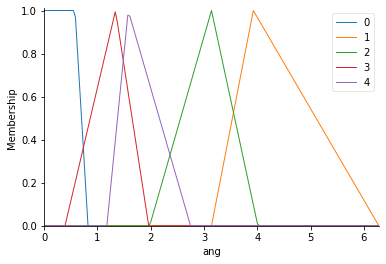

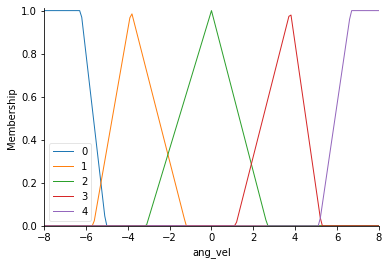

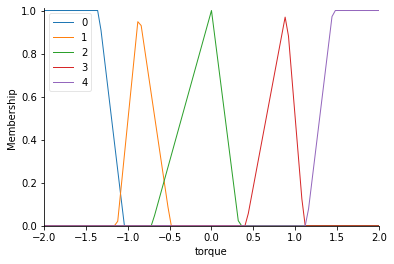

In [35]:
ang.view()
ang_vel.view()
torque.view()